# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

('Coefficients: \n', array([-0.31606659]))
Variance score: 0.04
Residual sum of squares: 0.67
Bias: 0.63237795666
Variance: 0.0298871047297


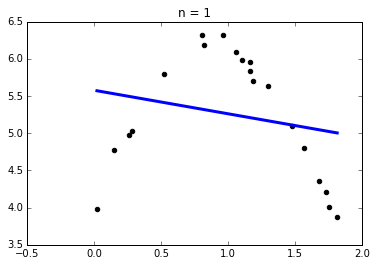

('Coefficients: \n', array([-0.35351166]))
Variance score: 0.21
Residual sum of squares: 0.67
Bias: 0.519764416259
Variance: 0.142500645131


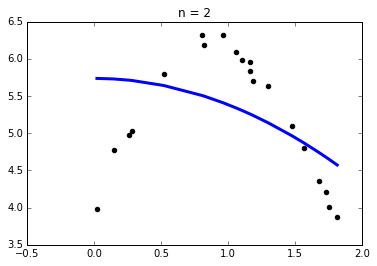

('Coefficients: \n', array([-0.2490689]))
Variance score: 0.35
Residual sum of squares: 0.67
Bias: 0.426303641235
Variance: 0.235961420154


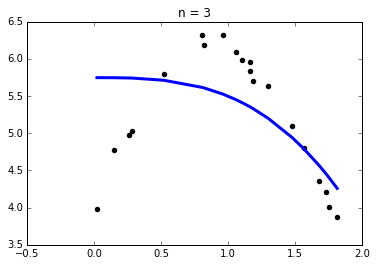

('Coefficients: \n', array([-0.15446584]))
Variance score: 0.44
Residual sum of squares: 0.67
Bias: 0.368453613101
Variance: 0.293811448288


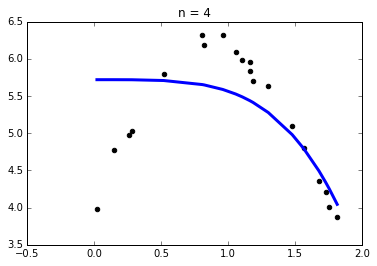

('Coefficients: \n', array([-0.09113004]))
Variance score: 0.49
Residual sum of squares: 0.67
Bias: 0.335909560243
Variance: 0.326355501147


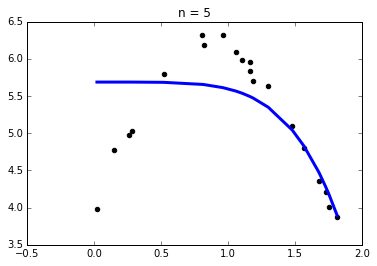

('Coefficients: \n', array([-0.05253061]))
Variance score: 0.51
Residual sum of squares: 0.67
Bias: 0.318888342166
Variance: 0.343376719223


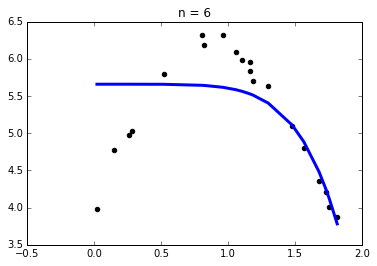

('Coefficients: \n', array([-0.02990425]))
Variance score: 0.52
Residual sum of squares: 0.67
Bias: 0.311203320004
Variance: 0.351061741385


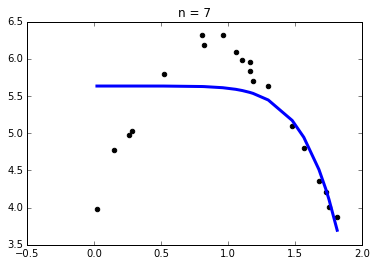

('Coefficients: \n', array([-0.01689342]))
Variance score: 0.53
Residual sum of squares: 0.67
Bias: 0.309203532931
Variance: 0.353061528458


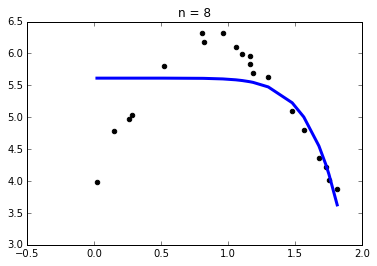

('Coefficients: \n', array([-0.00949334]))
Variance score: 0.52
Residual sum of squares: 0.67
Bias: 0.310728511663
Variance: 0.351536549726


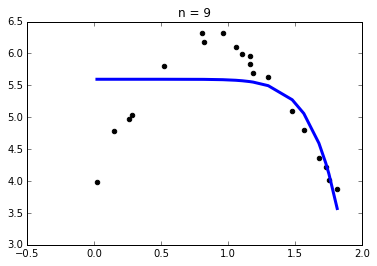

In [5]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])


for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) **2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

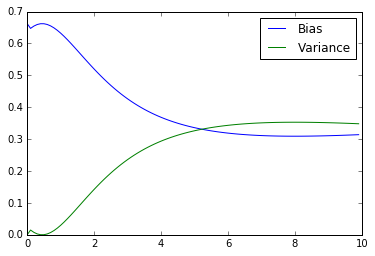

In [6]:
bs = [] #list of biases
vars_ = [] #list of variances
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    # Calculate statistics
    yhat = regr.predict(X)
    sse = np.mean(((np.mean(yhat)-Y)**2))
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    bs.append(bias)
    vars_.append(var)

#Plot the variance and bias
plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars_, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.31606659]))
Variance score: 0.04
Residual sum of squares: 0.67
Bias: 0.63237795666
Variance: 0.0298871047297


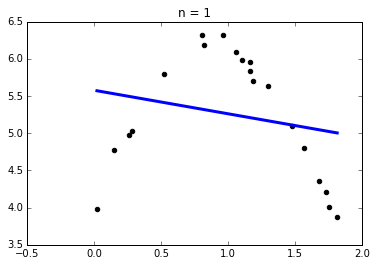

('Coefficients: \n', array([ 4.97010776, -2.80820064]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.00024963391141
Variance: 0.662015427478


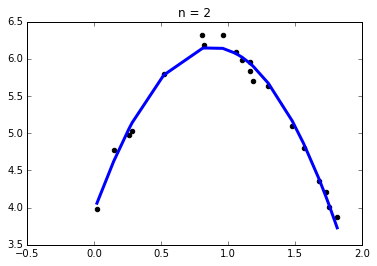

('Coefficients: \n', array([ 5.81226148, -3.92216907,  0.38793025]))
Variance score: 0.99
Residual sum of squares: 0.67
Bias: -0.00164261045335
Variance: 0.663907671843


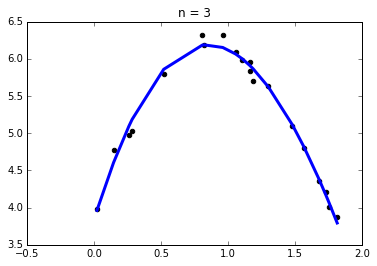

('Coefficients: \n', array([ 4.5807529 , -0.84928663, -2.23444494,  0.71526531]))
Variance score: 0.99
Residual sum of squares: 0.67
Bias: -0.00326881007825
Variance: 0.665533871468


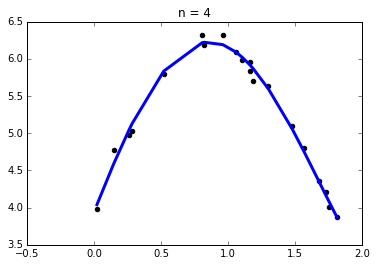

('Coefficients: \n', array([ 4.18105154,  0.8211932 , -4.7282442 ,  2.25293163, -0.33449808]))
Variance score: 0.99
Residual sum of squares: 0.67
Bias: -0.0033462867012
Variance: 0.66561134809


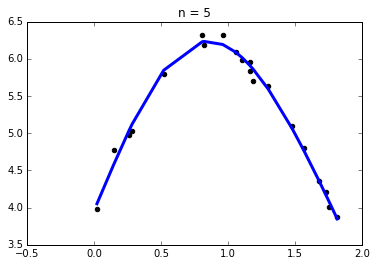

('Coefficients: \n', array([  6.64325597, -14.08078621,  28.60035409, -31.82958511,
        15.87438028,  -2.90972623]))
Variance score: 0.99
Residual sum of squares: 0.67
Bias: -0.00431481529102
Variance: 0.66657987668


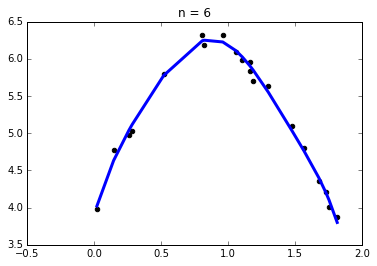

('Coefficients: \n', array([  12.4559114 ,  -59.20708017,  165.52755431, -234.78831376,
        172.9410722 ,  -63.87517733,    9.36937641]))
Variance score: 1.00
Residual sum of squares: 0.67
Bias: -0.00664589312095
Variance: 0.66891095451


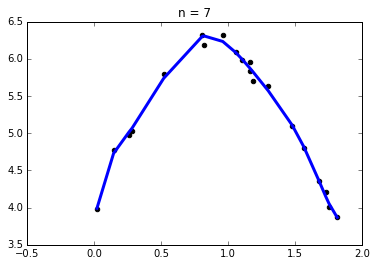

('Coefficients: \n', array([  15.11957072,  -84.89385721,  266.46845273, -435.93064021,
        394.73358993, -201.06220397,   53.94896526,   -5.92406109]))
Variance score: 1.00
Residual sum of squares: 0.67
Bias: -0.00680812928696
Variance: 0.669073190676


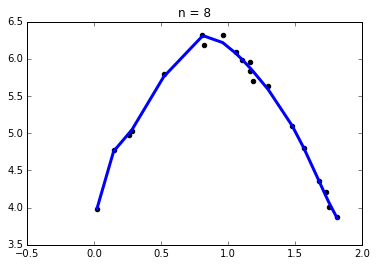

('Coefficients: \n', array([   18.86594431,  -129.52080883,   491.41804501, -1029.00882301,
        1293.6966556 , -1012.63442488,   484.72257403,  -129.93945267,
          14.93439658]))
Variance score: 1.00
Residual sum of squares: 0.67
Bias: -0.00700045020902
Variance: 0.669265511598


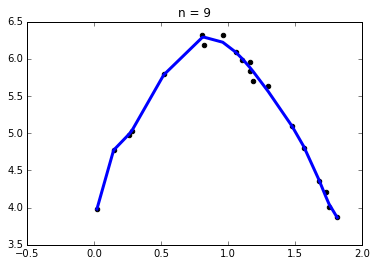

In [7]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

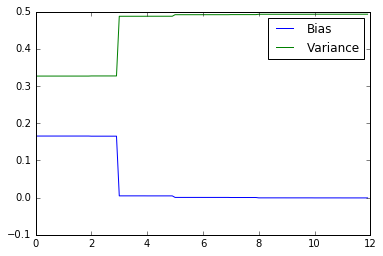

In [11]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity

Residual sum of squares: 0.47
Bias: 0.00184473727727
Variance: 0.454946232543


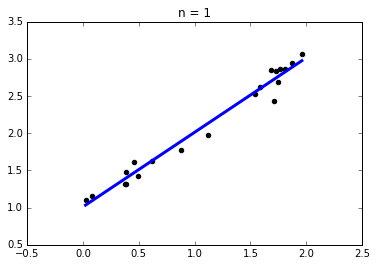

Residual sum of squares: 2.51
Bias: 0.58798899557
Variance: 1.91556500713


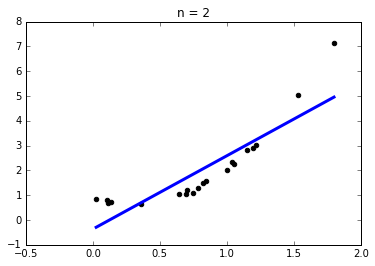

Residual sum of squares: 31.52
Bias: 7.27756731067
Variance: 24.2299735031


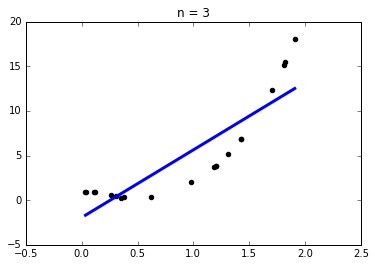

Residual sum of squares: 142.36
Bias: 46.7413262062
Variance: 95.6102914393


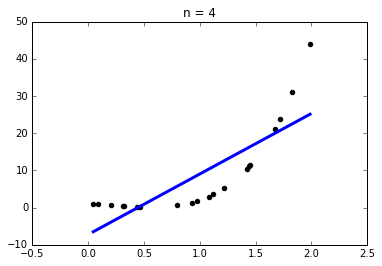

Residual sum of squares: 829.46
Bias: 227.616364955
Variance: 601.836341535


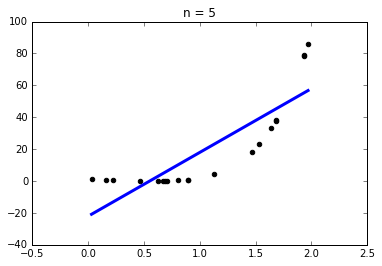

Residual sum of squares: 1402.25
Bias: 638.322526498
Variance: 763.917628265


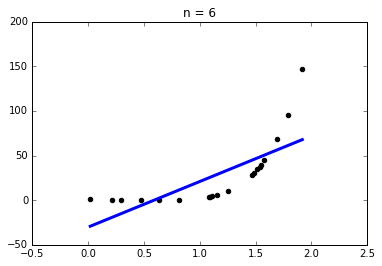

In [12]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
   
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    yhat = regr.predict(X)
    sse = np.mean((np.mean(Y)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # Computer the errors
    print("Residual sum of squares: %.2f" % sse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

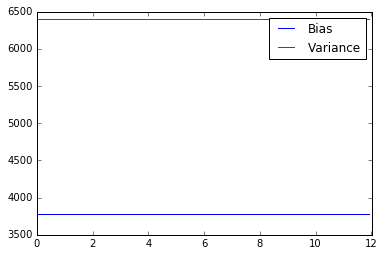

In [21]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = np.array([domain]).transpose()
   
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    yhat = regr.predict(X)
    sse = np.mean((np.mean(Y)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

# Advanced Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

Residual sum of squares: 0.48
Bias: 0.18326798114
Variance: 0.287222982638


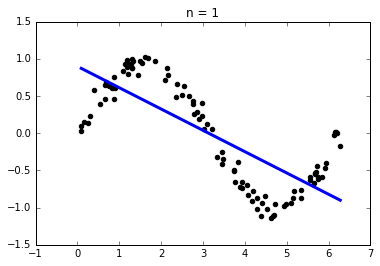

Residual sum of squares: 0.48
Bias: 0.179891014475
Variance: 0.290599949303


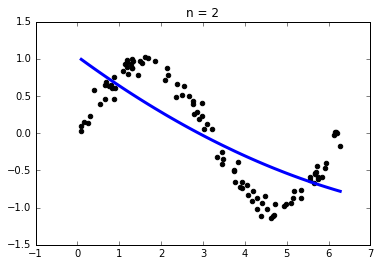

Residual sum of squares: 0.48
Bias: 0.00331049657593
Variance: 0.467180467203


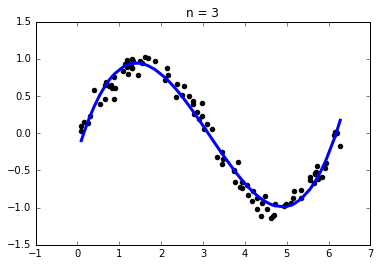

Residual sum of squares: 0.48
Bias: 0.00311470820686
Variance: 0.467376255572


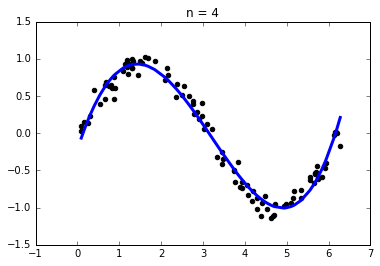

Residual sum of squares: 0.48
Bias: -0.00141131345624
Variance: 0.471902277235


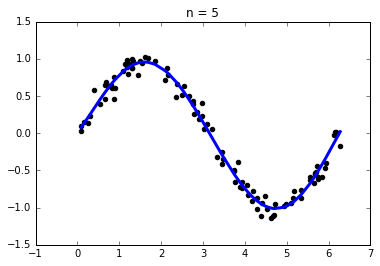

Residual sum of squares: 0.48
Bias: -0.001427933067
Variance: 0.471918896846


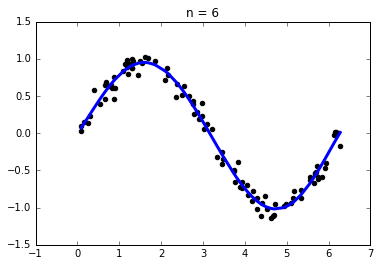

Residual sum of squares: 0.48
Bias: -0.00143955688514
Variance: 0.471930520664


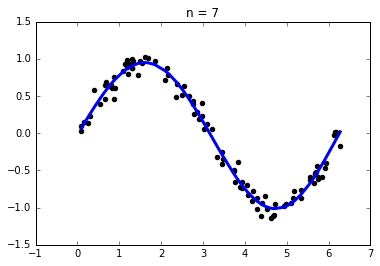

Residual sum of squares: 0.48
Bias: -0.00145783940299
Variance: 0.471948803182


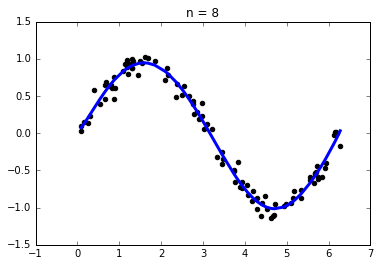

Residual sum of squares: 0.48
Bias: -0.00148787367093
Variance: 0.47197883745


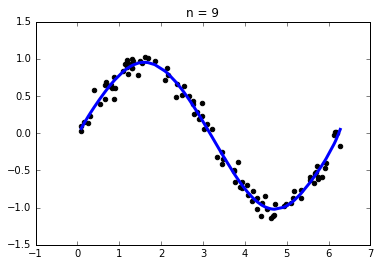

In [14]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    
    # Fit a polynomial of degree i to the data
    
    X = polynomials(domain, i)
   
    # Create linear regression object
    
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    yhat = regr.predict(X)
    sse = np.mean((np.mean(Y)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # Computer the errors
    print("Residual sum of squares: %.2f" % sse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.


Residual sum of squares: 10180.08
Bias: 3783.8060946
Variance: 6396.26530905


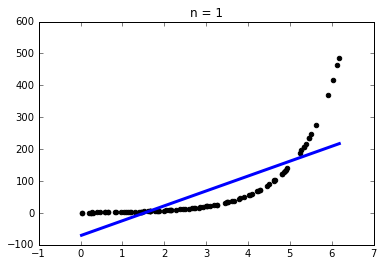

Residual sum of squares: 10180.08
Bias: 856.623536242
Variance: 9323.44786741


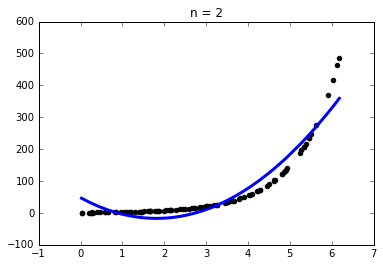

Residual sum of squares: 10180.08
Bias: 112.121672026
Variance: 10067.9497316


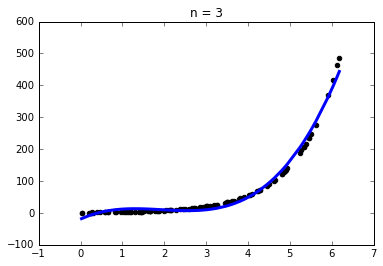

Residual sum of squares: 10180.08
Bias: 8.97220363987
Variance: 10171.0992


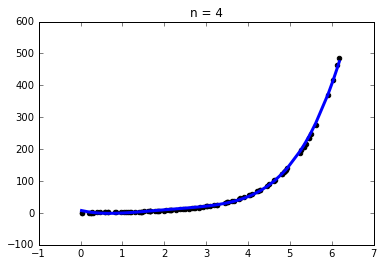

Residual sum of squares: 10180.08
Bias: 0.539915529655
Variance: 10179.5314881


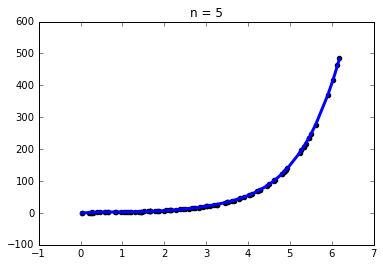

Residual sum of squares: 10180.08
Bias: 0.0230794572055
Variance: 10180.0483242


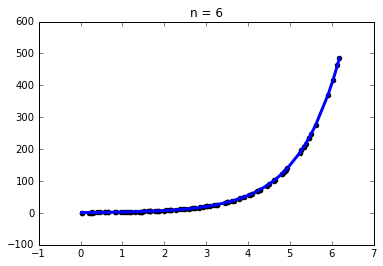

Residual sum of squares: 10180.08
Bias: 0.00107752523967
Variance: 10180.0703261


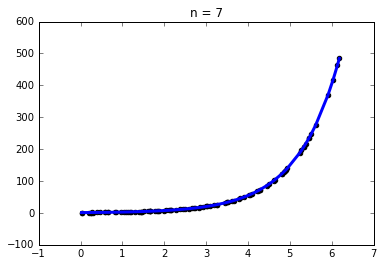

Residual sum of squares: 10180.08
Bias: 3.22633352334e-05
Variance: 10180.0713714


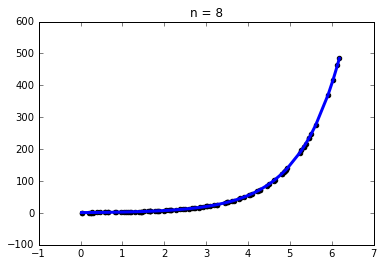

Residual sum of squares: 10180.08
Bias: -0.000152063583082
Variance: 10180.0715557


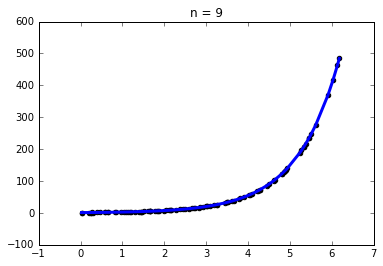

In [15]:
import math
f = lambda x: math.exp(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    
    # Fit a polynomial of degree i to the data
    
    X = polynomials(domain, i)
   
    # Create linear regression object
    
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    yhat = regr.predict(X)
    sse = np.mean((np.mean(Y)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # Computer the errors
    print("Residual sum of squares: %.2f" % sse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

In [ ]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    
    # Fit a polynomial of degree i to the data
    
    X = polynomials(domain, i)
   
    # Create linear regression object
    
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    
    yhat = regr.predict(X)
    sse = np.mean((np.mean(Y)-Y)**2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # Computer the errors
    print("Residual sum of squares: %.2f" % sse)
    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
    
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()